In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import json
from matplotlib import pyplot as plt
import numpy as np
import tqdm
import sys

In [2]:
test_link = 'https://www.wunderground.com/history/daily/jo/amman/OJAM/date/2025-7-10'

In [3]:
response = requests.get(test_link)

In [4]:
response

<Response [200]>

In [5]:
soup = BeautifulSoup(response.text, 'lxml')

In [6]:
tables = soup.find_all('table')

In [7]:
tables

[]

In [8]:
'table' in response.text.lower()

True

In [9]:
date = '20220110'

In [10]:
re = requests.get(f'https://api.weather.com/v1/location/OJAM:9:JO/observations/historical.json?apiKey=e1f10a1e78da46f5b10a1e78da96f525&units=e&startDate={date}')

In [11]:
json_data = json.loads(re.text)

In [44]:
def get_weather_for(year, month, day):

    month = f'0{month}' if month < 10 else month
    day = f'0{day}' if day < 10 else day
    
    date = f'{year}{month}{day}'
    
    response = requests.get(f'https://api.weather.com/v1/location/OJAM:9:JO/observations/historical.json?apiKey=e1f10a1e78da46f5b10a1e78da96f525&units=e&startDate={date}')
    json_data = json.loads(response.text)

    # print(json_data)
    if json_data['metadata']['status_code'] != 200:
        return None

    num_observations = len(json_data['observations'])

    temp_records = []
    dewPt_records = []
    humidity_records = []
    wind_direction_records = []
    wind_speed_records = []
    gust_records = []
    pressure_records = []
    condition_records = []

    for i in range(num_observations):
        temp = json_data['observations'][i]['temp']
        dew = json_data['observations'][i]['dewPt']
        humidity = json_data['observations'][i]['rh']
        wind_dir = json_data['observations'][i]['wdir']
        wind_spd = json_data['observations'][i]['wspd']
        gust = json_data['observations'][i]['gust']
        pressure = json_data['observations'][i]['pressure']
        condition = json_data['observations'][i]['wx_phrase']
        
        temp_records.append(temp if temp else 0)
        dewPt_records.append(dew if dew else 0)
        humidity_records.append(humidity if humidity else 0)
        wind_direction_records.append(wind_dir if wind_dir else 0)
        wind_speed_records.append(wind_spd if wind_spd else 0)
        gust_records.append(gust if gust else 0)
        pressure_records.append(pressure if pressure else 0)
        condition_records.append(condition if condition else 0)

    temp_np = np.array(temp_records) 
    dew_np = np.array(dewPt_records)
    wind_dir_np = np.array(wind_direction_records)
    wind_spd_np = np.array(wind_speed_records)
    gust_np = np.array(gust_records)
    pressure_np = np.array(pressure_records)
    condition_np = np.array(condition_records)

    temp_np_celc = (temp_np - 32) * 5 / 9
    dewPt_np_celc = (dew_np - 32) * 5 / 9

    weather_dic = {
        'Date' : date,
        'Temperature' : temp_np_celc,
        'Dew Point' : dewPt_np_celc,
        'Wind Direction' : wind_dir_np,
        'Wind Speed' : wind_spd_np,
        'Gust' : gust_np,
        'Pressure' : pressure_np,
        'Condition' : condition_np,
    }

    return weather_dic
    

    

In [52]:
test_dic = get_weather_for(2025,11,30)

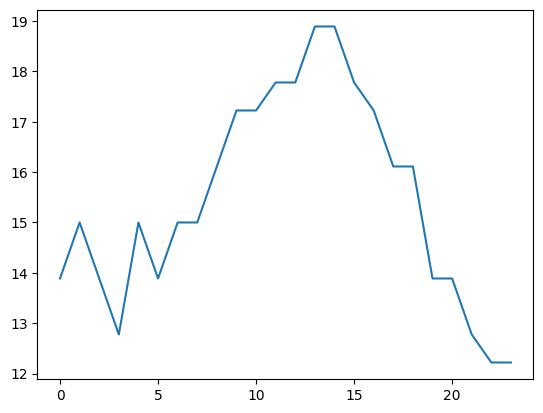

<Figure size 900x1600 with 0 Axes>

In [53]:
if test_dic:
    plt.plot(range(len(test_dic['Temperature'])), test_dic['Temperature'])
    plt.figure(figsize=(9,16))
    plt.show()

In [54]:
def get_valid_dates(year):

    valid_dates = []
    
    for month in range(1, 13):
        max_days_per_month = {
            1 : 31,
            2 : 29 if year % 4 == 0 else 28,
            3 : 31,
            4 : 30,
            5 : 31,
            6 : 30,
            7 : 31,
            8 : 31,
            9 : 30,
            10 : 31,
            11 : 30,
            12 : 31,
        }

        max_days = max_days_per_month[month]

        for day in range(1,max_days + 1): 
            
            date = (year, month, day)
            valid_dates.append(date)

    return valid_dates
    

In [55]:
dates_list = []
for i in range(2010,2026):
    dates = get_valid_dates(i)
    if dates:
        dates_list.append(dates)

In [56]:
dates_row = [i for sub in dates_list for i in sub]

In [57]:
dates_row

[(2010, 1, 1),
 (2010, 1, 2),
 (2010, 1, 3),
 (2010, 1, 4),
 (2010, 1, 5),
 (2010, 1, 6),
 (2010, 1, 7),
 (2010, 1, 8),
 (2010, 1, 9),
 (2010, 1, 10),
 (2010, 1, 11),
 (2010, 1, 12),
 (2010, 1, 13),
 (2010, 1, 14),
 (2010, 1, 15),
 (2010, 1, 16),
 (2010, 1, 17),
 (2010, 1, 18),
 (2010, 1, 19),
 (2010, 1, 20),
 (2010, 1, 21),
 (2010, 1, 22),
 (2010, 1, 23),
 (2010, 1, 24),
 (2010, 1, 25),
 (2010, 1, 26),
 (2010, 1, 27),
 (2010, 1, 28),
 (2010, 1, 29),
 (2010, 1, 30),
 (2010, 1, 31),
 (2010, 2, 1),
 (2010, 2, 2),
 (2010, 2, 3),
 (2010, 2, 4),
 (2010, 2, 5),
 (2010, 2, 6),
 (2010, 2, 7),
 (2010, 2, 8),
 (2010, 2, 9),
 (2010, 2, 10),
 (2010, 2, 11),
 (2010, 2, 12),
 (2010, 2, 13),
 (2010, 2, 14),
 (2010, 2, 15),
 (2010, 2, 16),
 (2010, 2, 17),
 (2010, 2, 18),
 (2010, 2, 19),
 (2010, 2, 20),
 (2010, 2, 21),
 (2010, 2, 22),
 (2010, 2, 23),
 (2010, 2, 24),
 (2010, 2, 25),
 (2010, 2, 26),
 (2010, 2, 27),
 (2010, 2, 28),
 (2010, 3, 1),
 (2010, 3, 2),
 (2010, 3, 3),
 (2010, 3, 4),
 (2010, 3, 5),

In [58]:
dates = get_valid_dates(2018)

In [59]:
len(dates)

365

In [60]:
weather_list = []
for date in tqdm.tqdm(dates_row):
    weather_on_date = get_weather_for(*date)
    weather_list.append(weather_on_date)

100%|████████████████████████████████████████████████████████████| 5844/5844 [1:03:31<00:00,  1.53it/s]


In [61]:
sys.getsizeof(weather_list)

47160

In [62]:
df = pd.DataFrame(weather_list)

AttributeError: 'NoneType' object has no attribute 'keys'

In [68]:
df.to_csv('../data/scraped_weather_2010_2025.csv')

In [65]:
weather_list_not_null = [i for i in weather_list if i]

In [67]:
df = pd.DataFrame(weather_list_not_null)

In [ ]:
df